<Figure size 432x288 with 0 Axes>

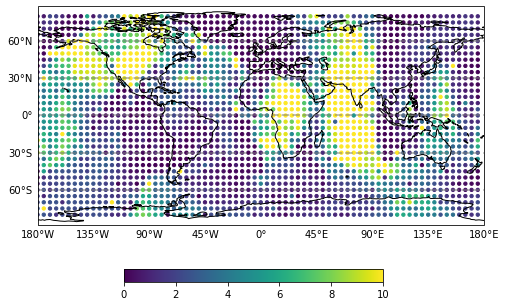

In [1]:
import numpy as np
import pickle
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# change this to alter the jerk number (in Python numbering, so jerk_number = 8 means event 9).
jerk_number = 8

# jerk times as defined in catalogue
jerk_times = [4605,5750,2920, 1915, 6450,7295,7620,7844,8878,9673,10593,12619,13412,13543]
# sample every year
time_yearly = np.arange(jerk_times[jerk_number]-200,jerk_times[jerk_number]+200+1)
t0 = jerk_times[jerk_number]
f_size = 16  # fontsize for figure

time_intervals_edges = np.arange(-210,211,20) + jerk_times[jerk_number]
Nsample = 100

filename = "../ensemble_diagnostics/Jerk{0:1d}_5x5_{1:d}M_20yr.results".format(jerk_number+1,Nsample)

with open(filename, "rb") as fp:   # Unpickling
     results = pickle.load(fp)

y_theta, y_phi, y_delta = [],[],[]

for j in range(len(results)):
    theta = results[j][0]
    phi = results[j][1]
    component = 1
    delta = results[j][9][10]  # this is the element that spans the event
    
    
    y_theta.append(theta)
    y_phi.append(phi)
# normalise by average value at location:
# exclude the end bins as they don't lie in the time window [-200, 200].
    y_delta.append ( delta /np.mean(results[j][9][1:len(results[j][9])-1] ))
    
cmap = plt.get_cmap('viridis')
plt.figure()

f, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,12),subplot_kw={'projection': ccrs.PlateCarree() }) 
#y_delta = np.array(y_delta)
marker_size = 11. 

 
cax = axes.scatter(y_phi,90.-np.array(y_theta), s = marker_size, c=y_delta,cmap=cmap, vmin=0, vmax=10)
gl = axes.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
              linewidth=2, color='gray', alpha=0.5, linestyle='--')

axes.coastlines()

gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.xlocator = mticker.FixedLocator([-180, -135., -90, -45., 0, 45., 90, 135., 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

cb_ax = f.add_axes([0.20, 0.31, 0.6, 0.1])
#cb_ax.scatter([0,1,2,3],[0,1,2,3],[0,1,2,4])
cbar = f.colorbar(cax, ax=cb_ax, orientation = 'horizontal')
cb_ax.set_axis_off()


outfname = 'Jerk_delta_map_'+str(jerk_number+1)+ '_5x5_'+str(Nsample)+'M'
f.savefig(outfname + '.pdf',bbox_inches = 'tight')

np.savetxt('jerk_finder_event' + str(jerk_number+1) + '_' + str(Nsample)+'M.txt',np.vstack((y_theta, y_phi, y_delta)).T, fmt='%d %d %.4f')
